<a href="https://colab.research.google.com/github/palak178/Machine-Learning/blob/main/Day2/Kaggle%20ass2/simple_linear_regression_placements_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use this dataset to understand simple linear regression. Contain two column Cgpa and Package. Build the model to predict package based on CGPA.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('placement.csv')

FileNotFoundError: ignored

In [ ]:
df.shape

(1000, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


No null values.

Target Variable: placement_exam_marks (It actually is the package (LPA))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df['placed'].value_counts()

0    511
1    489
Name: placed, dtype: int64

In [ ]:
print(df['cgpa'].min(), df['cgpa'].max())

4.89 9.12


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cgpa'>

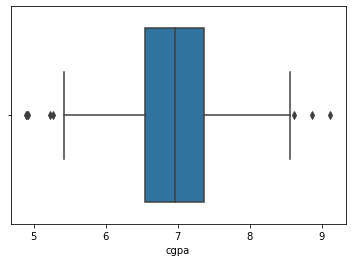

In [ ]:
sns.boxplot(df['cgpa'])

The data points below 5.4 and above 8.5 are considered as outliers.
Even if these data points are removed, the data isn't distributed linearly.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'PACKAGE OFFERED')

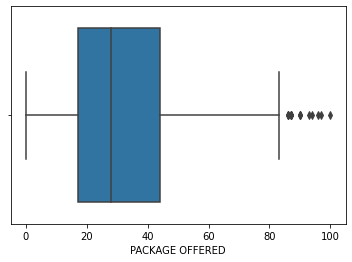

In [ ]:
sns.boxplot(df['placement_exam_marks'])
plt.xlabel('PACKAGE OFFERED')

Median of the Data is ~28LPA, There are also people who were offered more than 80 LPA.

In [ ]:
df.corr()

,cgpa,placement_exam_marks,placed
cgpa,1.000000,-0.027371,0.027212
placement_exam_marks,-0.027371,1.000000,-0.025530
placed,0.027212,-0.025530,1.000000


The CGPA and Placement marks are negatively weakly correlated.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CGPA', ylabel='Package Offered'>

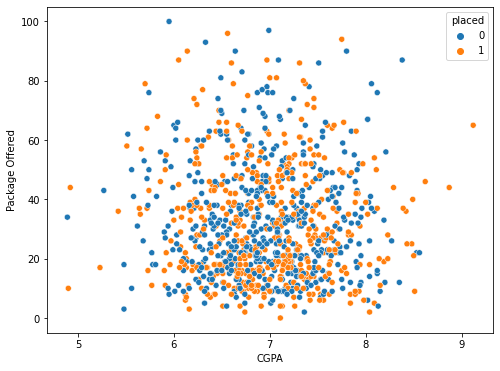

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('CGPA')
plt.ylabel('Package Offered')
sns.scatterplot(df['cgpa'], df['placement_exam_marks'], hue=df['placed'])

The data points are scattered almost randomly.

It is a regression problem as our target variable is placement_exam_marks (numeric variable).

In [ ]:
X = df[['cgpa']]  #, 'placed'

In [ ]:
y = df[['placement_exam_marks']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_pred, y_test)

335.0322585022387

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_1 = DecisionTreeRegressor(max_leaf_nodes=5)

In [ ]:
model_1.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=5)

In [ ]:
y_pred_1 = model_1.predict(X_test)

In [ ]:
mean_squared_error(y_pred_1, y_test)

326.24928421204817